**BIODATA**




In [1]:
# Nama  : Ratih Permatasari
# TTL   : Surabaya, 06 Juli 1996
# Email : permataranit@gmail.com

**IMPORT LIBRARY**

In [2]:
import numpy as np
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt

**DOWNLOAD FILE DAN SIMPAN DI PENYIMPANAN VIRTUAL COLLAB**

In [3]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /content/rockpaperscissors.zip
#PS : file ini dalam bentuk zip dan disimpan di folder content/

--2020-10-25 17:06:20--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/content/rockpaperscissors.zip’

/content/rockpapers 100%[===================>] 307.92M  5.51MB/s    in 71s     

2020-10-25 17:07:32 (4.32 MB/s) - ‘/content/rockpaperscissors.zip’ saved [322873683/322873683]



**EKSTRAKSI DAN CEK HASIL EKSTRAKSI**

In [4]:
zipnya = '/content/rockpaperscissors.zip' #PS : folder yang menyimpan file zip
zip_ref = zipfile.ZipFile(zipnya,'r')
zip_ref.extractall('/content') #PS : lokasi dimana konten zip akan di ekstraksi
zip_ref.close()

In [5]:
base = '/content/rockpaperscissors/rps-cv-images'
rock = os.path.join(base,'rock')
paper = os.path.join(base,'paper')
scissors = os.path.join(base,'scissors')

print('Banyak data rock\t: ', len(os.listdir(rock)))
print('Banyak data paper\t: ', len(os.listdir(paper)))
print('Banyak data scissors\t: ', len(os.listdir(scissors)))

Banyak data rock	:  726
Banyak data paper	:  712
Banyak data scissors	:  750


**PEMBAGIAN DATA DAN AUGMENTASI GAMBAR**

In [11]:
# ImageDataGenerator Function for Augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range=0.2,
    fill_mode = 'nearest',
    validation_split = 0.4) #PS : valsplit ini yang buat bagi secara otomatis buat val sama trainnya

# Load Folder for Train and Validation
# PS : gambar aslinya ukuran 200x300 dipotong setengahnya jadi 100x150
# PS : dengan flow_from_directory kelas akan terbagi sesuai dengan nama sub-folder dari folder utama
train_generator = train_datagen.flow_from_directory(
    base,
    target_size =(100,150),                 
    batch_size = 30,
    class_mode = 'categorical',
    shuffle = True,
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    base,
    target_size = (100,150),
    batch_size = 30,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [12]:
  #Print Labels to Know Label's Order
  labels = (train_generator.class_indices)
  labels = dict((v,k) for k,v in labels.items())
  print(labels)

{0: 'paper', 1: 'rock', 2: 'scissors'}


**PEMBUATAN MODEL CNN**

In [15]:
classi = Sequential()
# Layer 1
classi.add(Conv2D(16, (3, 3), input_shape = (100, 150, 3), activation = 'relu'))
classi.add(MaxPooling2D(pool_size = (2, 2)))
# Layer 2
classi.add(Conv2D(32, (3, 3), activation = 'relu'))
classi.add(MaxPooling2D(pool_size = (2, 2)))
# Layer 3
classi.add(Conv2D(64, (3, 3), activation = 'relu'))
classi.add(MaxPooling2D(pool_size = (2, 2)))
# Layer 4
classi.add(Conv2D(128, (3, 3), activation = 'relu'))
classi.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening Layer
classi.add(Flatten())

# Full Connection Layer
classi.add(Dense(units = 512, activation = 'relu'))
classi.add(Dropout(0.5))#dropout to avoid overfitting
classi.add(Dense(units = 256, activation = 'relu'))
classi.add(Dropout(0.5))
classi.add(Dense(units = 3, activation = 'softmax'))

# Summary
classi.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 98, 148, 16)       448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 49, 74, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 47, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 23, 36, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 21, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 10, 17, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 15, 128)       

In [16]:
# Adam Optimizer and Loss Entropy
classi.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Compiling and Record History
history = classi.fit(
            train_generator,
            steps_per_epoch=30,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=30,
            verbose=2
          )

Epoch 1/30
30/30 - 24s - loss: 1.1031 - accuracy: 0.3624 - val_loss: 1.0523 - val_accuracy: 0.3764
Epoch 2/30
30/30 - 23s - loss: 0.8111 - accuracy: 0.6320 - val_loss: 0.4270 - val_accuracy: 0.8581
Epoch 3/30
30/30 - 23s - loss: 0.4447 - accuracy: 0.8333 - val_loss: 0.2914 - val_accuracy: 0.9027
Epoch 4/30
30/30 - 24s - loss: 0.3356 - accuracy: 0.8725 - val_loss: 0.2481 - val_accuracy: 0.9130
Epoch 5/30
30/30 - 24s - loss: 0.3042 - accuracy: 0.8859 - val_loss: 0.2701 - val_accuracy: 0.9142
Epoch 6/30
30/30 - 24s - loss: 0.2368 - accuracy: 0.9189 - val_loss: 0.2403 - val_accuracy: 0.9222
Epoch 7/30
30/30 - 24s - loss: 0.2462 - accuracy: 0.9083 - val_loss: 0.2317 - val_accuracy: 0.9245
Epoch 8/30
30/30 - 24s - loss: 0.2004 - accuracy: 0.9351 - val_loss: 0.1851 - val_accuracy: 0.9405
Epoch 9/30
30/30 - 23s - loss: 0.1826 - accuracy: 0.9318 - val_loss: 0.2207 - val_accuracy: 0.9325
Epoch 10/30
30/30 - 23s - loss: 0.2229 - accuracy: 0.9256 - val_loss: 0.1707 - val_accuracy: 0.9508
Epoch 11/

**DATA VISUALITATION FOR LOSS AND ACCURACY**

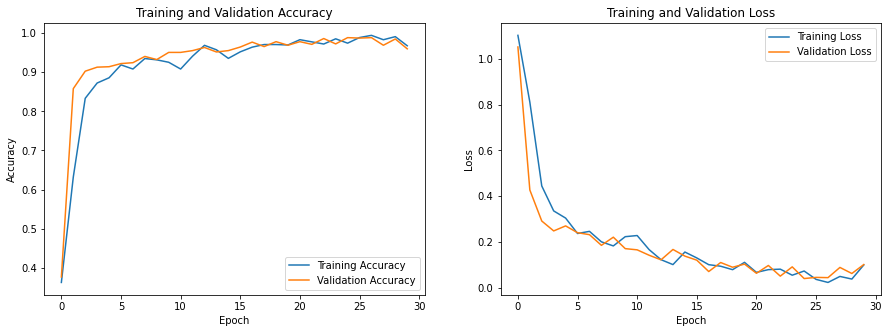

In [18]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Range and Size
epoch = range(30)
plt.figure(figsize=(15,5))

# History for Accuracy
plt.subplot(1, 2, 1)
plt.plot(epoch, train_acc, label='Training Accuracy')
plt.plot(epoch, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and Validation Accuracy')

# History for Loss
plt.subplot(1, 2, 2)
plt.plot(epoch, train_loss, label='Training Loss')
plt.plot(epoch, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

**IMAGE RECOGNITION (UPLOAD A FILE)**

Saving CemUmBPmUpNgXfMC.png to CemUmBPmUpNgXfMC.png
CemUmBPmUpNgXfMC.png
scissors


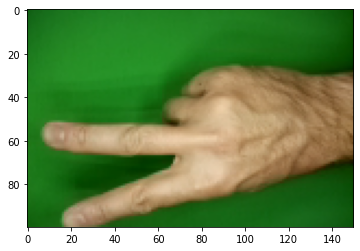

In [25]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = classi.predict(images, batch_size=30)


  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')